<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [196]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder
from sklearn.utils import shuffle
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-03-30 18:03:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.001s  

2020-03-30 18:03:23 (17.4 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [5]:
df.shape

(346, 10)

In [6]:
df.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [7]:
df.duplicated().sum()

0

### Convert to date time object 

In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [9]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [163]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: / ^C
failed

CondaError: KeyboardInterrupt



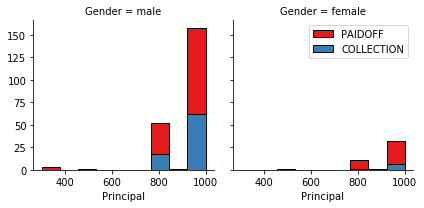

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

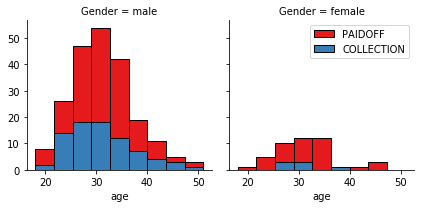

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

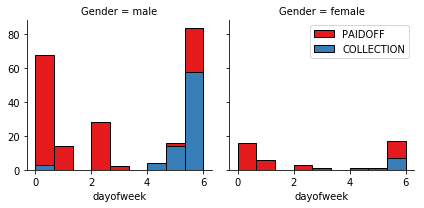

In [12]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [13]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

<!-- 86 % of female pay there loans while only 73 % of males pay there loan -->


In [15]:
for col in df.columns:
    print(col, len(df[col].unique()))

Unnamed: 0 346
Unnamed: 0.1 346
loan_status 2
Principal 5
terms 3
effective_date 7
due_date 23
age 32
education 4
Gender 2
dayofweek 7
weekend 2


In [16]:
cat_feat = [x for x in df.columns if df[x].dtypes =='O']
cat_feat

['loan_status', 'education', 'Gender']

<!-- Lets convert male to 0 and female to 1: -->
Lets appply LabelEncoding to Convert the Gender Categorical Feature

In [18]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [19]:
education_dict = {'High School or Below':1,'Bechalor':2,'college':3,'Master or Above':4}
df['education'] = df['education'].map(education_dict)

In [20]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,1,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,2,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,3,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,3,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,3,0,4,1


In [23]:
df_shuffled = shuffle(df)

In [24]:
df_shuffled.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
221,258,258,PAIDOFF,1000,7,2016-09-13,2016-09-19,25,3,0,1,0
183,215,215,PAIDOFF,1000,30,2016-09-12,2016-11-10,29,3,1,0,0
106,127,127,PAIDOFF,800,15,2016-09-11,2016-09-25,43,1,0,6,1
51,60,60,PAIDOFF,1000,30,2016-09-11,2016-10-10,34,2,0,6,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,3,0,4,1


## One Hot Encoding  
#### How about education?

In [25]:
# df.groupby(['education'])['loan_status'].value_counts(normalize=True)

#### Feature befor One Hot Encoding

In [26]:
# df[['Principal','terms','age','Gender','education']].head()

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [27]:
# Feature = df[['Principal','terms','age','Gender','weekend']]
# Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
# Feature.drop(['Master or Above'], axis = 1,inplace=True)
# Feature.head()


### Feature selection

In [25]:
Feature = df[['Principal','terms','age','Gender','education','weekend']]

Lets defind feature sets, X:

In [26]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,education,weekend
0,1000,30,45,0,1,0
1,1000,30,33,1,2,0
2,1000,15,27,0,3,0
3,1000,30,28,1,3,1
4,1000,30,29,0,3,1


What are our lables?

In [27]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [28]:
std = StandardScaler()
std.fit(X)
X = std.transform(X)

In [29]:
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.06604119,
        -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.00612667,
        -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004,  1.05378785,
        -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  1.05378785,
         0.82934003],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  1.05378785,
         0.82934003]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((276, 6), (276,))

In [32]:
def sKFoldAcc(cls):
    std = StratifiedKFold(n_splits=5)
    test_acc=[]
    train_acc=[]
    for train_index,test_index in std.split(X,y):
        X1_train,X1_test = X[train_index],X[test_index]
        y1_train,y1_test = y[train_index],y[test_index]
        cls.fit(X1_train,y1_train)
        test_acc.append(cls.score(X1_test,y1_test))
        train_acc.append(cls.score(X1_train,y1_train))
    return train_acc,test_acc

In [60]:
def getBestParams(cls,params):
    gsearch = GridSearchCV(cls, params,cv=5)
    gsearch.fit(X_train, y_train)
    return gsearch

In [34]:
def getBestParamsRSCV(cls,params,itr):
    rSearchCV = RandomizedSearchCV(cls, params,cv=5,n_iter=itr,n_jobs=-1)
    rSearchCV.fit(X_train, y_train)
    return rSearchCV

Lets find the best n_neighbors value using the error rate

In [35]:
test_accuracy=[]
train_accuracy=[]
traning_error=[]
testing_error=[]
k = range(1,15)
for i in k:
    knn_cl = KNeighborsClassifier(n_neighbors=i)
    knn_cl.fit(X_train,y_train)
    train_accuracy.append(knn_cl.score(X_train,y_train))
    test_accuracy.append(knn_cl.score(X_test,y_test))
    traning_error.append(np.mean(y_train!=(knn_cl.predict(X_train))))
    testing_error.append(np.mean(y_test!=(knn_cl.predict(X_test))))
    


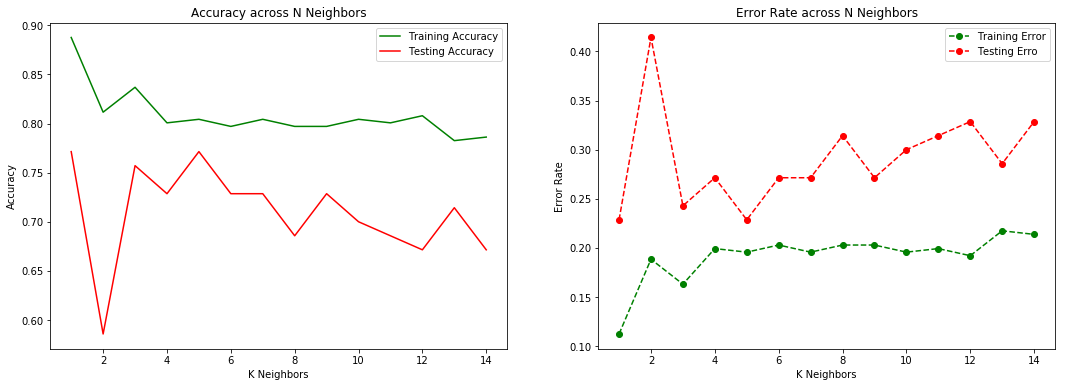

In [36]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(k,train_accuracy,label='Training Accuracy',color='g')
plt.plot(k,test_accuracy,label='Testing Accuracy',color='r')
plt.xlabel('K Neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy across N Neighbors')
plt.legend()
plt.subplot(1,2,2)
plt.plot(k,traning_error,label='Training Error',color='g',linestyle='--', marker='o')
plt.plot(k,testing_error,label='Testing Erro',color='r',linestyle='--',marker='o')
plt.xlabel('K Neighbors')
plt.ylabel('Error Rate')
plt.title('Error Rate across N Neighbors')
plt.legend()
plt.show()


###### From both the plots, K=5achieves the best result.

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train,y_train)
print('Training Accuracy at K=6: {0:0.02f}'.format(knn_classifier.score(X_train,y_train)))
print('Testing Accuracy at K=6: {0:0.02f}'.format(knn_classifier.score(X_test,y_test)))

Training Accuracy at K=6: 0.80
Testing Accuracy at K=6: 0.77


Performing GridSearchCV to find the right hyperparameters

In [61]:
parameters = {'n_neighbors':[5], 
               'weights':('uniform','distance'), 
              'algorithm':('auto', 'ball_tree', 'kd_tree', 'brute'),
              'leaf_size':np.arange(25,35)
             }
model_kNeiCl =getBestParams(KNeighborsClassifier(),parameters)
model_kNeiCl.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'uniform'}

In [42]:
k_best = model_kNeiCl.best_estimator_

In [43]:
k_best.score(X_train,y_train),k_best.score(X_test,y_test)


(0.8043478260869565, 0.7714285714285715)

In [49]:

acc_avg_test = []
acc_avg_train = []
for i in range(1,8):
    knn_std = KNeighborsClassifier(n_neighbors=i,leaf_size=25,weights='distance')
    train_acc, test_acc = sKFoldAcc(knn_std)
    acc_avg_test.append(np.mean(test_acc))
    acc_avg_train.append(np.mean(train_acc))

In [50]:
pd.DataFrame(np.array([acc_avg_train,acc_avg_test]).T,columns=['Training Accuracy','Testing Accuracy'])

,Training Accuracy,Testing Accuracy
0,0.892364,0.662402
1,0.897418,0.659586
2,0.906090,0.679793
3,0.906090,0.691263
4,0.906090,0.694203
5,0.906090,0.702774
6,0.906090,0.682609


Lets train the model with __n_neighbors=5__ for the full training data

In [55]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test),dtc.score(X_train,y_train)

(0.6714285714285714, 0.8985507246376812)

In [275]:
dtc

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [121]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':np.arange(2,7), 
              'max_depth':np.arange(2,5),
             }
model_dtc =getBestParams(DecisionTreeClassifier(),parameters)
model_dtc.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}

In [122]:
tree = model_dtc.best_estimator_
tree.fit(X_train,y_train)
tree.score(X_test,y_test),tree.score(X_train,y_train)


(0.8, 0.7391304347826086)

The accuracy didn't improve much, let's stick to the default parameters.

###### StratifiedKFold Validation

In [77]:
decTree = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_split=2)
train_acc, test_acc = sKFoldAcc(decTree)
decTree.fit(X_train,y_train)
decTree.score(X_test,y_test),decTree.score(X_train,y_train)

(0.8, 0.7391304347826086)

In [78]:
print('Average Testing Accuracy',np.mean(test_acc))
pd.DataFrame(np.array([train_acc,test_acc]).T,columns=['Training Accuracy','Testing Accuracy'])

Average Testing Accuracy 0.610103519668737


,Training Accuracy,Testing Accuracy
0,0.771739,0.514286
1,0.754513,0.275362
2,0.750903,0.753623
3,0.750903,0.753623
4,0.750903,0.753623


Let's create the model with the best parameters and train for the whole set.

In [101]:
decisionTree = DecisionTreeClassifier(criterion='gini',max_depth=2, min_samples_split=2)
decisionTree.fit(X,y)
# decisionTree.fit(X_train,y_train)
# decisionTree.score(X_test,y_test),tree.score(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Support Vector Machine

In [102]:
from sklearn.svm import SVC

In [123]:
svc_no_params = SVC(gamma =0.1)
svc_no_params.fit(X_train,y_train)
svc_no_params.score(X_test,y_test),svc_no_params.score(X_train,y_train)

(0.6857142857142857, 0.7717391304347826)

In [145]:
# parameters = {'C':[1,10,100,1000],'gamma':[0.1,0.001,0.0001], 'kernel':['linear','rbf']}
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]

In [146]:
model_svc =getBestParams(SVC(),parameters)
model_svc.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [147]:
svc_best = model_svc.best_estimator_
svc_best.fit(X_train,y_train)
svc_best.score(X_test,y_test),svc_best.score(X_train,y_train)

(0.6857142857142857, 0.7717391304347826)

In [140]:
train_sacc, test_sacc = sKFoldAcc(SVC(gamma=.4,C=100))


In [141]:
print('Average Testing Accuracy',np.mean(test_sacc))
pd.DataFrame(np.array([train_sacc,test_sacc]).T,columns=['Training Accuracy','Testing Accuracy'])

Average Testing Accuracy 0.7057971014492754


,Training Accuracy,Testing Accuracy
0,0.898551,0.500000
1,0.870036,0.565217
2,0.862816,0.768116
3,0.851986,0.855072
4,0.844765,0.840580


Lets train the model with __gamma=.4__, __C=100__ for the full training data

In [151]:
svm = SVC(gamma=0.4,C=100)
svm.fit(X,y)
# svm.fit(X_train,y_train)
# svm.score(X_test,y_test),svc_best.score(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.4, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [158]:
lgr_no_params = LogisticRegression()
lgr_no_params.fit(X_train,y_train)
lgr_no_params.score(X_test,y_test),lgr_no_params.score(X_train,y_train)

(0.7, 0.7753623188405797)

In [159]:
parameters = {
              'C':(1, 10, 100, 1000), 
              'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
             }

In [160]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
model_lgr =getBestParams(LogisticRegression(),parameters)
model_lgr.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [162]:
lgr_best = model_lgr.best_estimator_
lgr_best.fit(X_train,y_train)
lgr_best.score(X_test,y_test),lgr_best.score(X_train,y_train)
# y_pred = lgr_best.predict(X_test)

(0.7, 0.7753623188405797)

The accuracy didn't improve much, let's stick to the default parameters.

In [163]:
lgr = LogisticRegression()
lgr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation using Test set

In [195]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [165]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-03-30 18:26:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-03-30 18:26:14 (513 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [166]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [167]:
len(df_test)

54

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
Unnamed: 0        54 non-null int64
Unnamed: 0.1      54 non-null int64
loan_status       54 non-null object
Principal         54 non-null int64
terms             54 non-null int64
effective_date    54 non-null object
due_date          54 non-null object
age               54 non-null int64
education         54 non-null object
Gender            54 non-null object
dtypes: int64(5), object(5)
memory usage: 4.3+ KB


In [169]:
df_test.isna().sum()

Unnamed: 0        0
Unnamed: 0.1      0
loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [170]:
df_test['due_date'] = pd.to_datetime(df_test['due_date'])
df_test['effective_date'] = pd.to_datetime(df_test['effective_date'])
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [171]:
df_test['dayofweek'] = df_test['effective_date'].dt.dayofweek
df_test['weekend'] = df_test['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [172]:
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [173]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [174]:
df_test['education'] = df_test['education'].map(education_dict)

In [175]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,2,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,4,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,1,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,3,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,2,0,6,1


In [176]:
y_test = df_test['loan_status'].values

In [177]:
X_test = df_test[['Principal','terms','age','Gender','education','weekend']]

In [178]:
X_test.head()

,Principal,terms,age,Gender,education,weekend
0,1000,30,50,1,2,0
1,300,7,35,0,4,1
2,1000,30,43,1,1,1
3,1000,30,26,0,3,1
4,800,15,29,0,2,1


In [179]:
X_test= std.transform(X_test)

In [204]:
def calJaccardScore(y_pred):
    return np.round(jaccard_similarity_score(y_test,y_pred),2)

In [201]:
def calF1Score(y_pred):
    return np.round(f1_score(y_test,y_pred,average='micro'),2)

###### KNN

In [206]:
y_pred_knn = knn.predict(X_test)
knn_jaccard = calJaccardScore(y_pred_knn)
knn_f1 = calF1Score(y_pred_knn)

print('Jaccard Score using KNN model',knn_jaccard)
print('F1 Score using KNN model',knn_f1)

Jaccard Score using KNN model 0.76
F1 Score using KNN model 0.76


###### Decision Tree

In [213]:
y_pred_tree =decisionTree.predict(X_test)
tree_jaccard = calJaccardScore(y_pred_tree)
tree_f1 = calF1Score(y_pred_tree)

print('Jaccard Score using Decision Tree model',tree_jaccard)
print('F1 Score using Decision Tree model',tree_f1)

Jaccard Score using Decision Tree model 0.74
F1 Score using Decision Tree model 0.74


###### SVM

In [214]:
y_pred_svm =svm.predict(X_test)
svm_jaccard = calJaccardScore(y_pred_svm)
svm_f1 = calF1Score(y_pred_svm)

print('Jaccard Score using SVM model',svm_jaccard)
print('F1 Score using SVM model',svm_f1)

Jaccard Score using SVM model 0.7
F1 Score using SVM model 0.7


###### Logistic Regression

In [217]:
y_pred_lgr = lgr.predict(X_test)
lgr_jaccard = calJaccardScore(y_pred_lgr)
lgr_f1 = calF1Score(y_pred_lgr)
lgr_loss = np.round(log_loss(y_test,lgr.predict_proba(X_test)),2)
print('Jaccard Score using Logistic Regression model',lgr_jaccard)
print('F1 Score using Logistic Regression model',lgr_f1)
print('Log Loss using Logistic Regression model',lgr_loss)


Jaccard Score using Logistic Regression model 0.76
F1 Score using Logistic Regression model 0.76
Log Loss using Logistic Regression model 0.48


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.76    | 0.76     | NA      |
| Decision Tree      | 0.74    | 0.74     | NA      |
| SVM                | 0.70    | 0.70     | NA      |
| LogisticRegression | 0.76    | 0.76     | 0.48    

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>